In [9]:
# Load an example
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
%matplotlib inline


In [29]:
dataset = '/raid/julia/projects/fragment_embedding/vanessa_crag/heuristics25/triplets_rank3/sampleA.h5'
distanceset = '/raid/julia/projects/fragment_embedding/vanessa_crag/heuristics25/distances/rank3models/sampleArank3model_II/distances_sampleA.h5'


def plot_all_three(example, fig_outputdir):
    f = h5py.File(dataset, 'r')
    data = f['data'][example, ...]
    f.close()

    # Get positive and negative distance.
    f = h5py.File(distanceset, 'r')
    pos_dist = f['positive_dist'][example]
    neg_dist = f['negative_dist'][example]
    f.close()

    f, axarr = plt.subplots(3, 3)
    plt.axis('off')
    for number in range(3):
        axarr[number, 0].imshow(data[number, 0, :, :], cmap='Greys')
        axarr[number, 1].imshow(data[number, 1, :, :], cmap='gray')
        axarr[number, 2].imshow(data[number, 2, :, :], cmap='gray')

    
    # positive example
    axarr[0, 0].set_title('Anchor')        
#     axarr[1, 0].set_title('Positive Example dist %0.4f' %pos_dist, color='green')
#     axarr[2, 0].set_title('Negative Example dist %0.4f' %neg_dist, color='red')
    
    axarr[1, 0].set_title('Positive Example Dist %0.4f' %pos_dist)
    axarr[2, 0].set_title('Negative Example Dist %0.4f' %neg_dist)
    plt.tight_layout()
    
    
    # remove the x and y ticks
    for ax in list(axarr.flatten()):
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig(fig_outputdir + '%05i.png' %example, dpi=1000)
   



In [18]:
# Get some statistics.
f = h5py.File(distanceset, 'r')
total_num = f['negative_dist'].shape[0]
pos_dist = f['positive_dist'].value
neg_dist = f['negative_dist'].value
f.close()

wrong_instances = list(np.where(neg_dist < pos_dist)[0])

number_of_wrong = len(wrong_instances)
total = pos_dist.shape[0]
print 'positive distance mean %0.3f std %0.3f' %(np.mean(pos_dist), np.std(pos_dist))
print 'negative distance mean %0.3f std %0.3f' %(np.mean(neg_dist), np.std(neg_dist))
print 'mean margin %0.3f std %0.3f' %(np.mean(neg_dist-pos_dist), np.std(neg_dist-pos_dist))
print 'number of wrong instances/total: %d / %d, perc: %0.3f' %(number_of_wrong,total, number_of_wrong/float(total))

positive distance mean 0.366 std 0.241
negative distance mean 1.479 std 0.352
mean margin 1.113 std 0.444
number of wrong instances/total: 633 / 19544, perc: 0.032


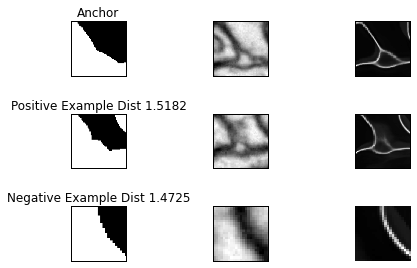

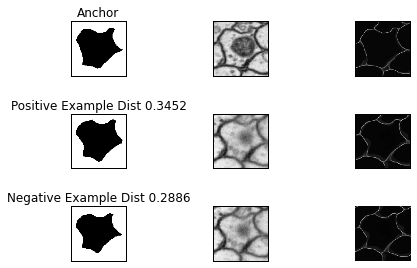

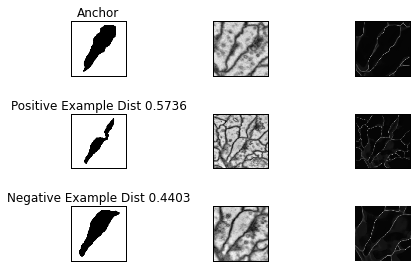

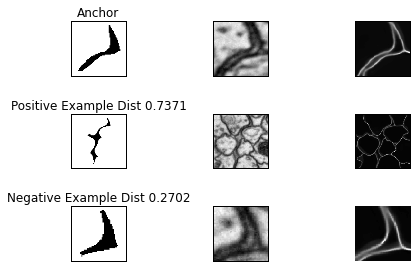

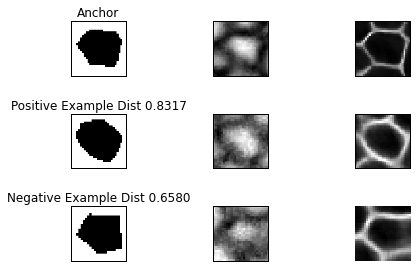

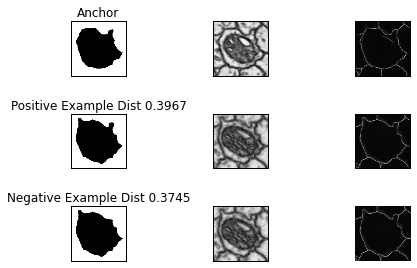

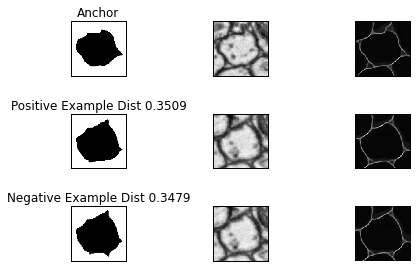

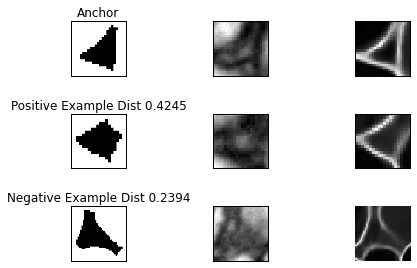

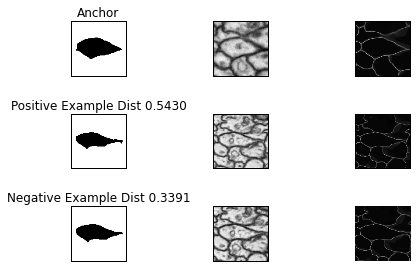

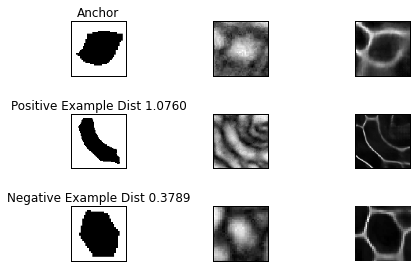

In [33]:
# Investigate False Positives
f = h5py.File(distanceset, 'r')
false_positives = list(f['false_pos'].value[0])
total_num = f['negative_dist'].shape[0]
f.close()
false_positive_selection = random.sample(false_positives, 10)
fig_outputdir = '/raid/julia/documents/Dropbox/Doktorarbeit/2016/NIPS/presentations/2d_supervoxels_notebook/wrong/'
for false_pos in false_positive_selection:
    plot_all_three(false_pos, fig_outputdir)
    



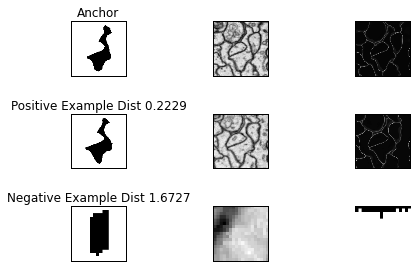

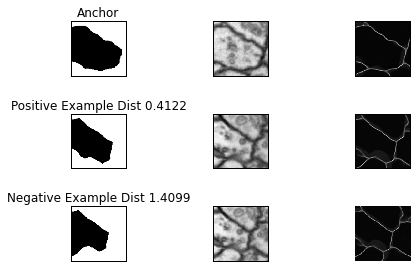

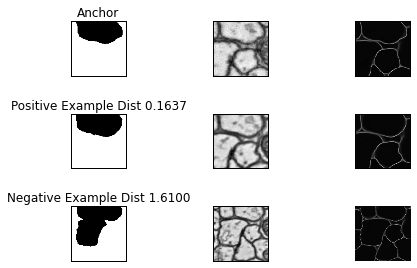

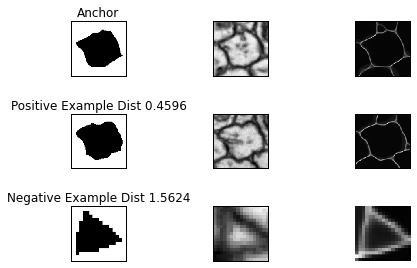

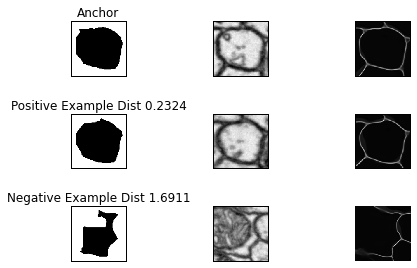

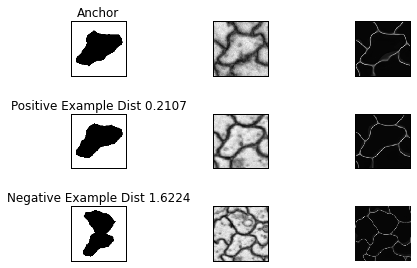

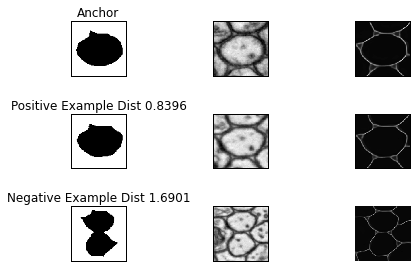

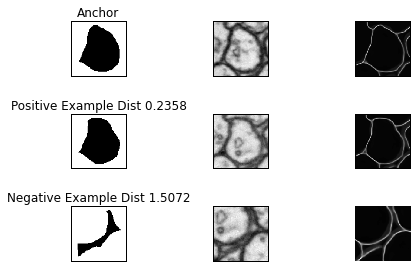

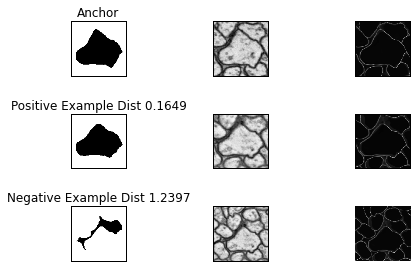

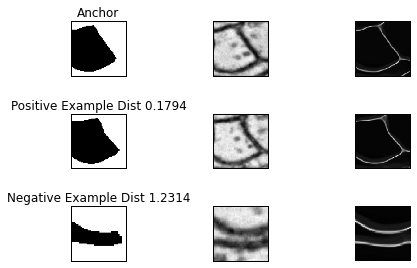

In [34]:
# INvestigate True Positives

true_positives = random.sample(range(total_num), 10)
fig_outputdir = '/raid/julia/documents/Dropbox/Doktorarbeit/2016/NIPS/presentations/2d_supervoxels_notebook/right/'
for true_pos in true_positives:
    if true_pos not in false_positives:
        
        plot_all_three(true_pos, fig_outputdir)
